In [1]:
import pandas as pd

In [3]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [5]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22184 entries, 0 to 22183
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                22184 non-null  datetime64[ns]
 1   都道府県コード           22184 non-null  int64         
 2   都道府県名             22184 non-null  object        
 3   各地の感染者数_1日ごとの発表数  22184 non-null  int64         
 4   各地の感染者数_累計        22184 non-null  int64         
 5   各地の死者数_1日ごとの発表数   22184 non-null  int64         
 6   各地の死者数_累計         22184 non-null  int64         
 7   感染者数移動平均7         22178 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.4+ MB


In [6]:
prefs = {
    "東京都": ("-",1),
    "大阪府": ("-",1),
    "京都府": ("-",1),
    "兵庫県": ("-",1),
    "埼玉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "千葉県": ("--",1.0),
    "愛知県": ("--",1.0),
    "宮城県": ("--",1.0),
    "沖縄県": ("--",1.0),
    "福岡県": (":",1),
    "北海道": (":",1),
}

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


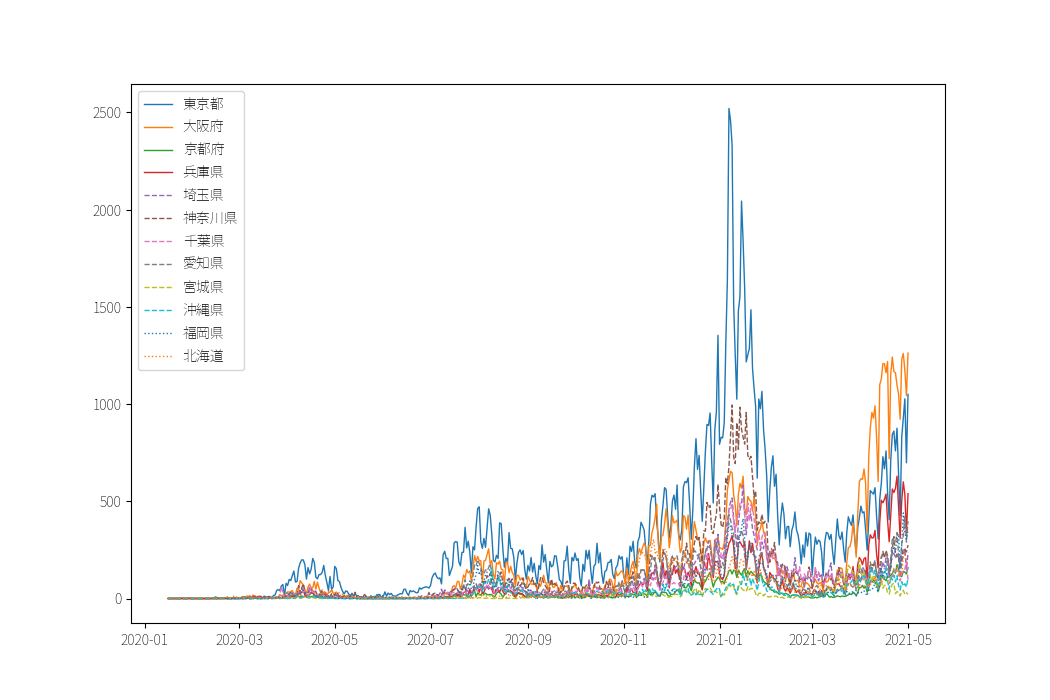

In [9]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])

plt.legend()

<IPython.core.display.Javascript object>


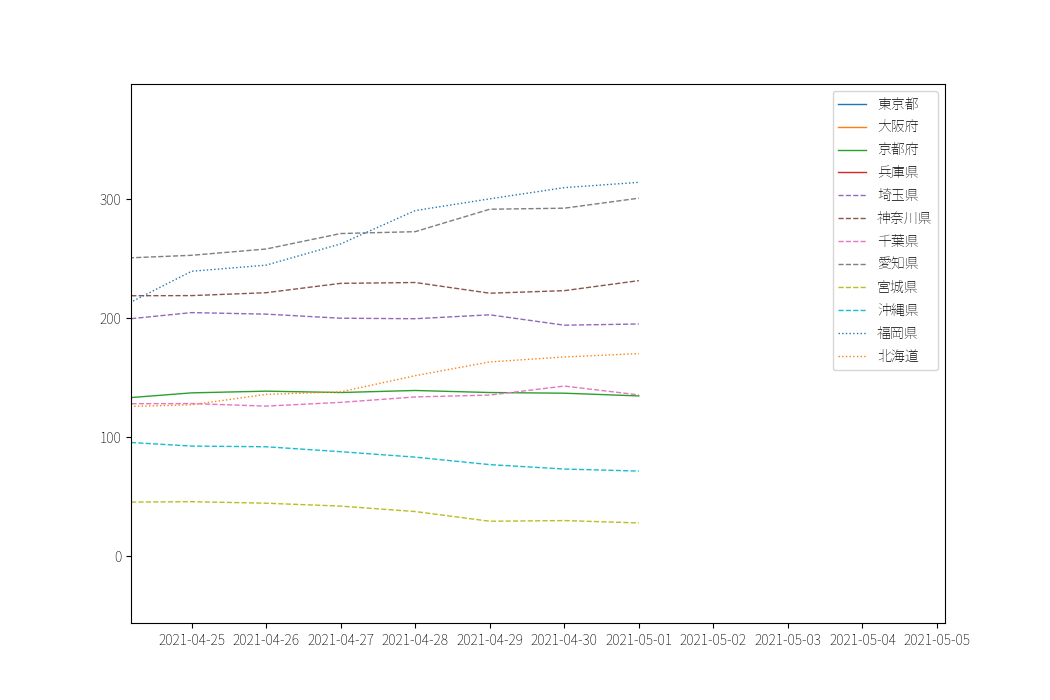

In [10]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])

plt.legend()